In [143]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [104]:
# calculate probability of winning (score +1), losing (score -1), and tieing (score 0), and calculate expected score
# for a district, given my number of coin and the list of opponents coin numbers in the district

def expected_score(n,opp_n,district):
    # n: number of coins that I put in this district 
    # opp_n: list of the numbers of coins that opponents put in this district
    # district: district number (1~10)
    
    return (np.sum((opp_n*district)<n)-np.sum(opp_n>(n*district)))/len(opp_n)
        

In [105]:
def total_expected_score(myentry,oppentry_list):
    score = 0
    if np.sum(myentry) != 100:
        print("sum=%d, total number of coins should be 100." %np.sum(myentry))
    for district in np.arange(1,11): 
        score += expected_score(myentry[district-1],oppentry_list[:,district-1],district)
        
    return score

Since I have no idea what strategy others would choose (because this is my first time playing with them and I have no prior info), simply assume that the numbers of coins opponents put are equally distributed from 0 to 100 in each district. 

In [106]:
oppentry_list = np.repeat(np.transpose([np.arange(0,101)]),10,axis=1)

In [121]:
#test
#entry = np.repeat(10,10)
entry = [10,10,5,5,5,15,15,15,10,10]

print(entry)
total_expected_score(entry,oppentry_list)

[10, 10, 5, 5, 5, 15, 15, 15, 10, 10]


-3.9504950495049505

Run Metropolis Hastings MCMC to maximize output

In [222]:
def MetropolisHastings(nsim,entry0,oppentry_list,RT=0.05):
    traj_entry = [] #entry trajectory
    traj_score = []
    traj_entry.append(entry0)
    traj_score.append(total_expected_score(entry0,oppentry_list))
    district_inds = np.arange(10)
    
    entry = entry0
    for i in np.arange(nsim,dtype=int):
        score = total_expected_score(entry,oppentry_list)
        #randomly move one coin from one district to another
        new_entry = np.copy(entry)
        d1 = sp.random.choice(np.where(new_entry>0)[0],1)
        d2 = sp.random.choice(district_inds[district_inds!=d1],1)
        new_entry[d1] -= 1
        new_entry[d2] += 1
        
        new_score = total_expected_score(new_entry,oppentry_list)
        
        p = np.exp((new_score-score)/RT)
        
        if (sp.rand()<p):
            entry = np.copy(new_entry)
            score = np.copy(new_score)
        
        traj_entry.append(entry)
        traj_score.append(score)

    return traj_entry,traj_score
        
        

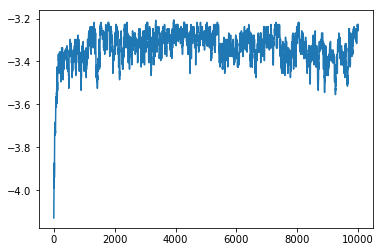

In [264]:
#score trajectory
traj_entry,traj_score = MetropolisHastings(1e4,np.repeat(10,10),oppentry_list,RT=0.02)
plt.plot(traj_score)

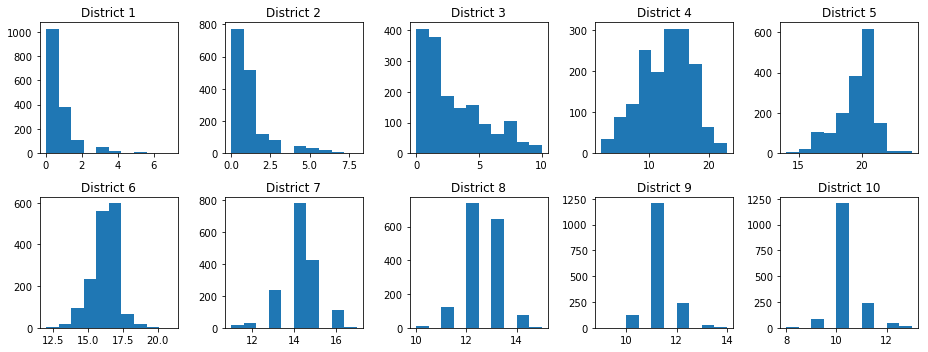

In [265]:
fig,ax = plt.subplots(nrows=2,ncols=5,figsize=(13,5))

ax = ax.flatten()
for i in range(10):
    ax[i].hist(np.array(traj_entry)[2000::5,i],bins=10)
    ax[i].set_title('District %d' %(i+1))
    
plt.tight_layout()

In [272]:
(np.array(traj_entry)[2000::5,:]).mean(axis=0)

array([  0.57713929,   0.97064335,   2.46408495,  12.77701437,
        19.11742661,  16.19113054,  14.18925671,  12.42036227,
        11.11805122,  10.17489069])

When uniform distribution is assumed, the optimal bet is something close to [0,1,2,13,20,17,14,12,11,10]. 